In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load all required images
fg = cv2.imread('fg.jpg')
bg = cv2.imread('bg.jpg')
degraded = cv2.imread('Degraded.jpg')
clean = cv2.imread('Clear.jpg')
bell = cv2.imread('bell.jpg', 0) # Load as grayscale for Canny
finger = cv2.imread('finger_print.jpg', 0) # Load as grayscale for Canny

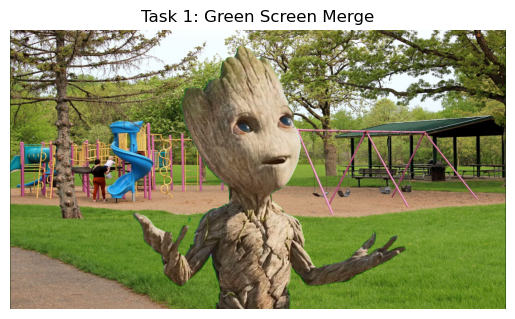

In [12]:
def mergeImage(fg, bg):
    height, width, _ = fg.shape
    bg_resized = cv2.resize(bg, (width, height))
    result = fg.copy()
    
    for y in range(height):
        for x in range(width):
            b, g, r = fg[y, x]
            # Use int() to prevent uint8 overflow during comparison
            if int(g) > 150 and int(g) > int(r) + 50 and int(g) > int(b) + 50:
                result[y, x] = bg_resized[y, x]
    return result

# Execute and Display Task 1
merged_result = mergeImage(fg, bg)
plt.imshow(cv2.cvtColor(merged_result, cv2.COLOR_BGR2RGB))
plt.title("Task 1: Green Screen Merge")
plt.axis('off')
plt.show()

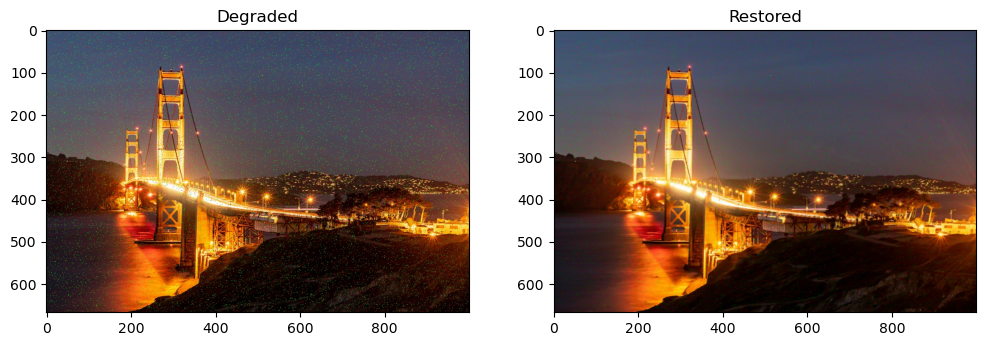

In [13]:
# Apply Median Blur to remove colored noise
# A kernel size of 3 is usually enough to remove single-pixel noise
restored = cv2.medianBlur(degraded, 3)

# Display Comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB)); plt.title("Degraded")
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)); plt.title("Restored")
plt.show()

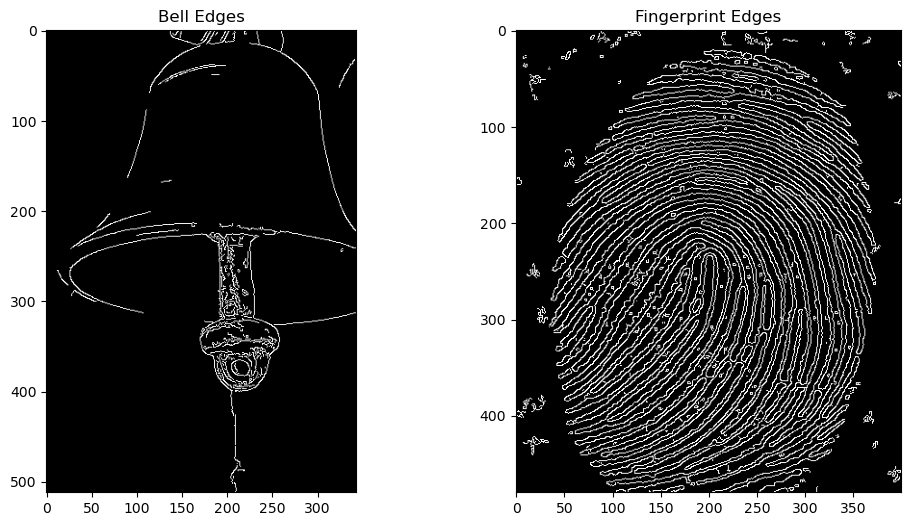

In [14]:
# Canny Edge Detection
edges_bell = cv2.Canny(bell, 100, 200)
edges_finger = cv2.Canny(finger, 50, 150)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(edges_bell, cmap='gray'); plt.title("Bell Edges")
plt.subplot(1, 2, 2); plt.imshow(edges_finger, cmap='gray'); plt.title("Fingerprint Edges")
plt.show()